In [2]:
import pandas as pd
import numpy as np
import tushare as ts
from stock import *


data = pd.read_csv('C:\\Users\\longf.DESKTOP-7QSFE46\GitHub\\A-Stock-Prediction-System-with-GAN-and-DRL\\dataset\\DailyTotal-600690.SH.csv')

data.describe()

,Unnamed: 0,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,total_share,trade_date,trade_date_x_y,trade_date_y_y,ts_code,ts_code_x_y,ts_code_y_y,unrest_pledge,vol_x_y,vol_y_y
count,2692.000000,2.692000e+03,2.583000e+03,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,...,242.000000,2.200000e+01,9.800000e+02,2.140000e+03,0.0,0.0,0.0,242.000000,7.640000e+02,22.000000
mean,1345.500000,2.013063e+07,2.013021e+07,15.491916,15.792907,15.202474,15.514053,15.502695,0.011359,0.091464,...,529080.718843,2.014242e+07,2.016480e+07,2.014184e+07,NaN,NaN,NaN,218.790579,1.580305e+07,1908.826364
std,777.257786,3.169659e+04,3.196148e+04,5.770961,5.897934,5.634658,5.774849,5.762323,0.451183,2.644812,...,137250.493296,3.119627e+04,1.179646e+04,2.529704e+04,NaN,NaN,NaN,117.882067,1.084101e+08,3574.432890
min,0.000000,2.008010e+07,2.008010e+07,7.210000,7.400000,6.900000,7.210000,7.210000,-2.700000,-10.030000,...,272083.590000,2.008072e+07,2.014112e+07,2.010033e+07,NaN,NaN,NaN,0.460000,2.000000e+03,10.210000
25%,672.750000,2.010093e+07,2.010087e+07,10.685000,10.870000,10.490000,10.680000,10.680000,-0.195000,-1.310000,...,304612.510000,2.012072e+07,2.015112e+07,2.012061e+07,NaN,NaN,NaN,188.395000,2.686045e+05,110.967500
50%,1345.500000,2.013071e+07,2.013052e+07,14.050000,14.250000,13.770000,14.030000,14.030000,0.010000,0.070000,...,609740.270000,2.014566e+07,2.016120e+07,2.014082e+07,NaN,NaN,NaN,242.115000,1.338596e+06,362.960000
75%,2018.250000,2.016041e+07,2.016051e+07,19.225000,19.685000,18.795000,19.250000,19.250000,0.210000,1.475000,...,609763.070000,2.017089e+07,2.017121e+07,2.016103e+07,NaN,NaN,NaN,288.487500,5.630562e+06,1496.155000
max,2691.000000,2.018123e+07,2.018123e+07,32.440000,32.980000,31.610000,32.200000,32.200000,2.700000,10.040000,...,612315.430000,2.018053e+07,2.018123e+07,2.018123e+07,NaN,NaN,NaN,1055.080000,2.415000e+09,12194.800000


In [3]:
data.isna().sum()

Unnamed: 0             0
cal_date               0
trade_date_x_x       109
open                 109
high                 109
low                  109
close_x_x            109
pre_close            109
change               109
pct_chg              109
vol                  109
amount               109
trade_date_y_x       109
close_y_x            109
turnover_rate        109
turnover_rate_f      109
volume_ratio         109
pe                   109
pe_ttm               109
pb                   109
ps                   109
ps_ttm               109
total_share_x        109
float_share_x        109
free_share           109
total_mv             109
circ_mv              109
trade_date_x_x.1     137
buy_sm_vol           137
buy_sm_amount        137
                    ... 
float_ratio         2692
float_share_y       2692
ggt_ss              1750
ggt_sz              2222
hgt                 1730
high_limit          1675
low_limit           1718
north_money         1712
pledge_count        2450


In [4]:
data.index

RangeIndex(start=0, stop=2692, step=1)

In [5]:
data.columns

Index(['Unnamed: 0', 'cal_date', 'trade_date_x_x', 'open', 'high', 'low',
       'close_x_x', 'pre_close', 'change', 'pct_chg',
       ...
       'total_share', 'trade_date', 'trade_date_x_y', 'trade_date_y_y',
       'ts_code', 'ts_code_x_y', 'ts_code_y_y', 'unrest_pledge', 'vol_x_y',
       'vol_y_y'],
      dtype='object', length=521)

In [6]:
data.rename(columns={'Unnamed: 0':'index'}, inplace=True)

In [7]:
data

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,total_share,trade_date,trade_date_x_y,trade_date_y_y,ts_code,ts_code_x_y,ts_code_y_y,unrest_pledge,vol_x_y,vol_y_y
0,0,20080102,20080102.0,22.50,24.50,22.29,24.03,22.46,1.57,6.9900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20080103,20080103.0,24.03,25.20,23.81,24.54,24.03,0.51,2.1200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20080104,20080104.0,24.53,24.79,23.68,24.17,24.54,-0.37,-1.5100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20080107,20080107.0,24.03,24.75,23.70,24.38,24.17,0.21,0.8700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20080108,20080108.0,24.38,24.38,23.48,23.53,24.38,-0.85,-3.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,20080109,20080109.0,23.20,24.02,22.80,23.88,23.53,0.35,1.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,20080110,20080110.0,23.92,23.93,23.41,23.50,23.88,-0.38,-1.5900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,20080111,20080111.0,23.46,23.72,22.85,23.68,23.50,0.18,0.7700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,20080114,20080114.0,23.68,24.46,23.50,24.14,23.68,0.46,1.9400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,20080115,20080115.0,24.46,25.48,24.28,25.30,24.14,1.16,4.8100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
import matplotlib.pyplot as plt
import random


for i in range(10):
    plt.figure()
    index = random.randint(0,data.shape[1])
    print(index)
    y = data[data.columns[index]]
    x = data['index']
    plt.plot(x, y)

242
204
93
324
438
349
226
262
330
327


In [9]:
data

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,total_share,trade_date,trade_date_x_y,trade_date_y_y,ts_code,ts_code_x_y,ts_code_y_y,unrest_pledge,vol_x_y,vol_y_y
0,0,20080102,20080102.0,22.50,24.50,22.29,24.03,22.46,1.57,6.9900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20080103,20080103.0,24.03,25.20,23.81,24.54,24.03,0.51,2.1200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20080104,20080104.0,24.53,24.79,23.68,24.17,24.54,-0.37,-1.5100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20080107,20080107.0,24.03,24.75,23.70,24.38,24.17,0.21,0.8700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20080108,20080108.0,24.38,24.38,23.48,23.53,24.38,-0.85,-3.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,20080109,20080109.0,23.20,24.02,22.80,23.88,23.53,0.35,1.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,20080110,20080110.0,23.92,23.93,23.41,23.50,23.88,-0.38,-1.5900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,20080111,20080111.0,23.46,23.72,22.85,23.68,23.50,0.18,0.7700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,20080114,20080114.0,23.68,24.46,23.50,24.14,23.68,0.46,1.9400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,20080115,20080115.0,24.46,25.48,24.28,25.30,24.14,1.16,4.8100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.drop_duplicates()

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,total_share,trade_date,trade_date_x_y,trade_date_y_y,ts_code,ts_code_x_y,ts_code_y_y,unrest_pledge,vol_x_y,vol_y_y
0,0,20080102,20080102.0,22.50,24.50,22.29,24.03,22.46,1.57,6.9900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20080103,20080103.0,24.03,25.20,23.81,24.54,24.03,0.51,2.1200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20080104,20080104.0,24.53,24.79,23.68,24.17,24.54,-0.37,-1.5100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20080107,20080107.0,24.03,24.75,23.70,24.38,24.17,0.21,0.8700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20080108,20080108.0,24.38,24.38,23.48,23.53,24.38,-0.85,-3.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,20080109,20080109.0,23.20,24.02,22.80,23.88,23.53,0.35,1.4900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,20080110,20080110.0,23.92,23.93,23.41,23.50,23.88,-0.38,-1.5900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,20080111,20080111.0,23.46,23.72,22.85,23.68,23.50,0.18,0.7700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,20080114,20080114.0,23.68,24.46,23.50,24.14,23.68,0.46,1.9400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,20080115,20080115.0,24.46,25.48,24.28,25.30,24.14,1.16,4.8100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.columns.difference(data.columns)

Index([], dtype='object')

In [12]:
data_dup = data.T.drop_duplicates(keep='first').T 
# 去掉重复的数据列 使用转置再转置的方式 非常牛逼

In [13]:
data_dup

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,rzye,sgt,south_money,total_share,trade_date,trade_date_x_y,trade_date_y_y,unrest_pledge,vol_x_y,vol_y_y
0,0,20080102,2.00801e+07,22.5,24.5,22.29,24.03,22.46,1.57,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20080103,2.00801e+07,24.03,25.2,23.81,24.54,24.03,0.51,2.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20080104,2.00801e+07,24.53,24.79,23.68,24.17,24.54,-0.37,-1.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20080107,2.00801e+07,24.03,24.75,23.7,24.38,24.17,0.21,0.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20080108,2.00801e+07,24.38,24.38,23.48,23.53,24.38,-0.85,-3.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,20080109,2.00801e+07,23.2,24.02,22.8,23.88,23.53,0.35,1.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,20080110,2.00801e+07,23.92,23.93,23.41,23.5,23.88,-0.38,-1.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,20080111,2.00801e+07,23.46,23.72,22.85,23.68,23.5,0.18,0.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,20080114,2.00801e+07,23.68,24.46,23.5,24.14,23.68,0.46,1.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,20080115,2.00801e+07,24.46,25.48,24.28,25.3,24.14,1.16,4.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data_dup.columns

Index(['index', 'cal_date', 'trade_date_x_x', 'open', 'high', 'low',
       'close_x_x', 'pre_close', 'change', 'pct_chg',
       ...
       'rzye', 'sgt', 'south_money', 'total_share', 'trade_date',
       'trade_date_x_y', 'trade_date_y_y', 'unrest_pledge', 'vol_x_y',
       'vol_y_y'],
      dtype='object', length=246)

In [15]:
data.columns.difference(data_dup.columns)

Index(['acc_exp', 'acc_receivable', 'acting_trading_sec', 'acting_uw_sec',
       'adminexp_of_gr', 'agency_bus_liab', 'amor_exp', 'amount_x_x',
       'amount_y_x', 'ann_date_y',
       ...
       'ts_code_y_y', 'turn_days', 'uncon_invest_loss', 'undist_profit',
       'undist_profit_ps', 'une_prem_reser', 'vol_x_x', 'vol_y_x',
       'working_capital', 'yoy_net_profit'],
      dtype='object', length=275)

63
212
67
232
33


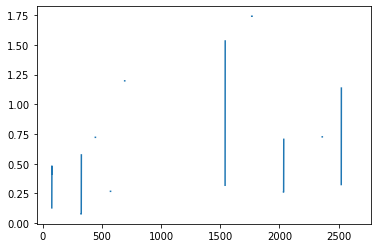

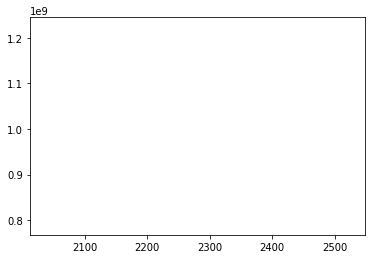

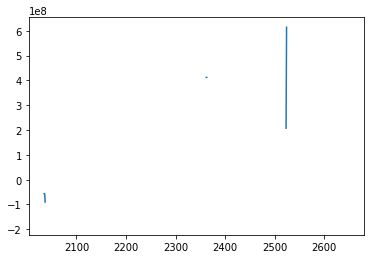

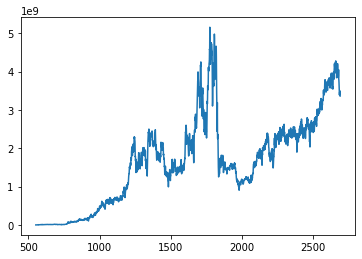

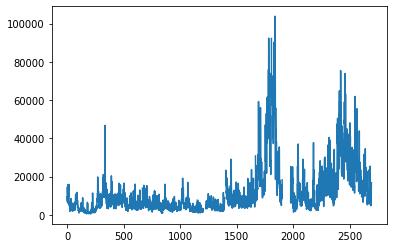

In [16]:
import matplotlib.pyplot as plt
import random


for i in range(5):
    plt.figure()
    index = random.randint(0,data_dup.shape[1])
    print(index)
    y = data_dup[data_dup.columns[index]]
    x = data_dup['index']
    
    plt.plot(x, y)

In [17]:
data_dup.isna().sum()

index                    0
cal_date                 0
trade_date_x_x         109
open                   109
high                   109
low                    109
close_x_x              109
pre_close              109
change                 109
pct_chg                109
vol                    109
amount                 109
turnover_rate          109
turnover_rate_f        109
volume_ratio           109
pe                     109
pe_ttm                 109
pb                     109
ps                     109
ps_ttm                 109
total_share_x          109
float_share_x          109
free_share             109
total_mv               109
circ_mv                109
trade_date_x_x.1       137
buy_sm_vol             137
buy_sm_amount          137
sell_sm_vol            137
sell_sm_amount         137
                      ... 
im_n_incr_cash_equ    2668
amount_x_y            1660
amount_y_y            2670
ann_date_x            1653
end_date_y            2450
ggt_ss                1750
g

<Figure size 1008x1152 with 0 Axes>

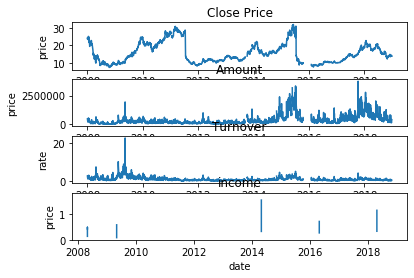

In [41]:
import datetime

fig = plt.figure(figsize=(14, 16))
fig, axes = plt.subplots(nrows=4, ncols=1)

x = data_dup['cal_date']
x_t = pd.to_datetime(data_dup['cal_date'], format='%Y%m%d')

y_close = data_dup['close_x_x'] # 收盘价
y_amount = data_dup['amount'] # 成交额
y_turnover = data_dup['turnover_rate'] # 换手率
y_eps = data_dup['basic_eps']# 每股收益

axes[0].set(title='Close Price', 
               xlabel='date',
               ylabel='price')
axes[0].plot(x_t,y_close)
axes[1].set(title='Amount', 
               xlabel='date',
               ylabel='price')
axes[1].plot(x_t,y_amount)
axes[2].set(title='Turnover', 
               xlabel='date',
               ylabel='rate')
axes[2].plot(x_t,y_turnover)
axes[3].set(title='income', 
               xlabel='date',
               ylabel='price')
axes[3].plot(x_t,y_eps)

plt.show()

In [19]:
pd.to_datetime(data['cal_date'], format='%Y%m%d')

0      2008-01-02
1      2008-01-03
2      2008-01-04
3      2008-01-07
4      2008-01-08
5      2008-01-09
6      2008-01-10
7      2008-01-11
8      2008-01-14
9      2008-01-15
10     2008-01-16
11     2008-01-17
12     2008-01-18
13     2008-01-21
14     2008-01-22
15     2008-01-23
16     2008-01-24
17     2008-01-25
18     2008-01-28
19     2008-01-29
20     2008-01-30
21     2008-01-31
22     2008-02-01
23     2008-02-04
24     2008-02-05
25     2008-02-13
26     2008-02-14
27     2008-02-15
28     2008-02-18
29     2008-02-19
          ...    
2662   2018-11-19
2663   2018-11-20
2664   2018-11-21
2665   2018-11-22
2666   2018-11-23
2667   2018-11-26
2668   2018-11-27
2669   2018-11-28
2670   2018-11-29
2671   2018-11-30
2672   2018-12-03
2673   2018-12-04
2674   2018-12-05
2675   2018-12-06
2676   2018-12-07
2677   2018-12-10
2678   2018-12-11
2679   2018-12-12
2680   2018-12-13
2681   2018-12-14
2682   2018-12-17
2683   2018-12-18
2684   2018-12-19
2685   2018-12-20
2686   201

In [36]:
data_dup

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,trade_date_x_y,trade_date_y_y,unrest_pledge,vol_x_y,vol_y_y,ma7,ma21,26ema,12ema,MACD
0,0,20080102,2.00801e+07,22.5,24.5,22.29,24.03,22.46,1.57,6.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.030000,24.030000,0.000000
1,1,20080103,2.00801e+07,24.03,25.2,23.81,24.54,24.03,0.51,2.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.294808,24.306250,0.011442
2,2,20080104,2.00801e+07,24.53,24.79,23.68,24.17,24.54,-0.37,-1.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.249966,24.253072,0.003106
3,3,20080107,2.00801e+07,24.03,24.75,23.7,24.38,24.17,0.21,0.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.286317,24.293138,0.006820
4,4,20080108,2.00801e+07,24.38,24.38,23.48,23.53,24.38,-0.85,-3.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.110924,24.085796,-0.025128
5,5,20080109,2.00801e+07,23.2,24.02,22.8,23.88,23.53,0.35,1.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.064672,24.035777,-0.028895
6,6,20080110,2.00801e+07,23.92,23.93,23.41,23.5,23.88,-0.38,-1.59,...,NaN,NaN,NaN,NaN,NaN,24.004286,NaN,23.964248,23.916220,-0.048028
7,7,20080111,2.00801e+07,23.46,23.72,22.85,23.68,23.5,0.18,0.77,...,NaN,NaN,NaN,NaN,NaN,23.954286,NaN,23.918449,23.866925,-0.051524
8,8,20080114,2.00801e+07,23.68,24.46,23.5,24.14,23.68,0.46,1.94,...,NaN,NaN,NaN,NaN,NaN,23.897143,NaN,23.951287,23.920949,-0.030339
9,9,20080115,2.00801e+07,24.46,25.48,24.28,25.3,24.14,1.16,4.81,...,NaN,NaN,NaN,NaN,NaN,24.058571,NaN,24.137397,24.182278,0.044882


In [21]:
data.rank()

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,total_share,trade_date,trade_date_x_y,trade_date_y_y,ts_code,ts_code_x_y,ts_code_y_y,unrest_pledge,vol_x_y,vol_y_y
0,1.0,1.0,1.0,2238.0,2297.5,2251.0,2298.0,2237.5,2566.0,2550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2.0,2.0,2301.5,2322.5,2312.0,2316.5,2300.0,2353.5,2135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,3.0,3.0,2322.5,2305.0,2307.0,2303.0,2321.5,334.0,577.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,2301.5,2302.5,2308.5,2308.0,2305.0,1934.5,1714.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,2311.0,2292.0,2300.0,2282.0,2310.0,77.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.0,6.0,6.0,2276.0,2286.0,2273.0,2292.0,2284.0,2192.0,1942.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7.0,7.0,7.0,2297.0,2280.0,2297.0,2277.5,2294.0,317.0,558.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8.0,8.0,8.0,2284.0,2272.0,2277.5,2284.0,2279.5,1864.5,1679.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.0,9.0,9.0,2289.0,2296.0,2301.5,2302.0,2286.0,2314.5,2092.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.0,10.0,10.0,2316.0,2334.0,2333.0,2346.0,2304.0,2543.0,2480.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
import sys

projectpath = 'C:\\Users\\longf.DESKTOP-7QSFE46\\GitHub\\A-Stock-Prediction-System-with-GAN-and-DRL'
sys.path.append(projectpath)
sys.path

['C:\\Users\\longf.DESKTOP-7QSFE46\\GitHub\\A-Stock-Prediction-System-with-GAN-and-DRL\\bin',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\Anaconda3\\envs\\keras\\python37.zip',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\Anaconda3\\envs\\keras\\DLLs',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\Anaconda3\\envs\\keras\\lib',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\Anaconda3\\envs\\keras',
 '',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\Anaconda3\\envs\\keras\\lib\\site-packages',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\Anaconda3\\envs\\keras\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\.ipython',
 'C:\\Users\\longf.DESKTOP-7QSFE46\\GitHub\\A-Stock-Prediction-System-with-GAN-and-DRL']

In [40]:
# import stockstats

def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close_x_x'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close_x_x'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = pd.DataFrame(dataset['close_x_x']).ewm(span=26).mean()
    dataset['12ema'] = pd.DataFrame(dataset['close_x_x']).ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    dataset['20sd'] = dataset['close_x_x'].rolling(window=20).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = pd.DataFrame(dataset['close_x_x']).ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['close_x_x']-1
    
    return dataset

get_technical_indicators(data_dup)

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
0,0,20080102,2.00801e+07,22.5,24.5,22.29,24.03,22.46,1.57,6.99,...,NaN,NaN,24.030000,24.030000,0.000000,NaN,NaN,NaN,24.030000,23.03
1,1,20080103,2.00801e+07,24.03,25.2,23.81,24.54,24.03,0.51,2.12,...,NaN,NaN,24.294808,24.306250,0.011442,NaN,NaN,NaN,24.412500,23.54
2,2,20080104,2.00801e+07,24.53,24.79,23.68,24.17,24.54,-0.37,-1.51,...,NaN,NaN,24.249966,24.253072,0.003106,NaN,NaN,NaN,24.244615,23.17
3,3,20080107,2.00801e+07,24.03,24.75,23.7,24.38,24.17,0.21,0.87,...,NaN,NaN,24.286317,24.293138,0.006820,NaN,NaN,NaN,24.336000,23.38
4,4,20080108,2.00801e+07,24.38,24.38,23.48,23.53,24.38,-0.85,-3.49,...,NaN,NaN,24.110924,24.085796,-0.025128,NaN,NaN,NaN,23.796446,22.53
5,5,20080109,2.00801e+07,23.2,24.02,22.8,23.88,23.53,0.35,1.49,...,NaN,NaN,24.064672,24.035777,-0.028895,NaN,NaN,NaN,23.852225,22.88
6,6,20080110,2.00801e+07,23.92,23.93,23.41,23.5,23.88,-0.38,-1.59,...,24.004286,NaN,23.964248,23.916220,-0.048028,NaN,NaN,NaN,23.617301,22.5
7,7,20080111,2.00801e+07,23.46,23.72,22.85,23.68,23.5,0.18,0.77,...,23.954286,NaN,23.918449,23.866925,-0.051524,NaN,NaN,NaN,23.659107,22.68
8,8,20080114,2.00801e+07,23.68,24.46,23.5,24.14,23.68,0.46,1.94,...,23.897143,NaN,23.951287,23.920949,-0.030339,NaN,NaN,NaN,23.979719,23.14
9,9,20080115,2.00801e+07,24.46,25.48,24.28,25.3,24.14,1.16,4.81,...,24.058571,NaN,24.137397,24.182278,0.044882,NaN,NaN,NaN,24.859921,24.3


In [27]:
data_dup.rank()

,index,cal_date,trade_date_x_x,open,high,low,close_x_x,pre_close,change,pct_chg,...,trade_date_x_y,trade_date_y_y,unrest_pledge,vol_x_y,vol_y_y,ma7,ma21,26ema,12ema,MACD
0,1.0,1.0,1.0,2238.0,2297.5,2251.0,2298.0,2237.5,2566.0,2550.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2423.0,2413.0,1211.0
1,2.0,2.0,2.0,2301.5,2322.5,2312.0,2316.5,2300.0,2353.5,2135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2435.0,2430.0,1254.0
2,3.0,3.0,3.0,2322.5,2305.0,2307.0,2303.0,2321.5,334.0,577.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2433.0,2426.0,1219.0
3,4.0,4.0,4.0,2301.5,2302.5,2308.5,2308.0,2305.0,1934.5,1714.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2434.0,2428.0,1238.0
4,5.0,5.0,5.0,2311.0,2292.0,2300.0,2282.0,2310.0,77.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2426.0,2418.0,1123.0
5,6.0,6.0,6.0,2276.0,2286.0,2273.0,2292.0,2284.0,2192.0,1942.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2424.0,2414.0,1108.0
6,7.0,7.0,7.0,2297.0,2280.0,2297.0,2277.5,2294.0,317.0,558.5,...,NaN,NaN,NaN,NaN,NaN,2195.0,NaN,2420.0,2407.0,1036.0
7,8.0,8.0,8.0,2284.0,2272.0,2277.5,2284.0,2279.5,1864.5,1679.5,...,NaN,NaN,NaN,NaN,NaN,2191.0,NaN,2418.0,2404.0,1023.0
8,9.0,9.0,9.0,2289.0,2296.0,2301.5,2302.0,2286.0,2314.5,2092.5,...,NaN,NaN,NaN,NaN,NaN,2190.0,NaN,2419.0,2408.0,1103.0
9,10.0,10.0,10.0,2316.0,2334.0,2333.0,2346.0,2304.0,2543.0,2480.5,...,NaN,NaN,NaN,NaN,NaN,2196.0,NaN,2427.0,2423.0,1367.0


In [35]:
data_dup.describe()

,ma7,ma21,26ema,12ema,MACD
count,2433.000000,2146.000000,2692.000000,2692.000000,2692.000000
mean,15.322089,15.032197,15.423843,15.395597,-0.028246
std,5.650799,5.424145,5.607915,5.708580,0.676604
min,7.514286,7.722857,8.000030,7.742934,-4.562085
25%,10.581429,10.412381,10.468447,10.422808,-0.244796
50%,13.935714,13.768571,13.979816,13.956769,0.037465
75%,19.008571,18.751905,19.225984,19.127407,0.304672
max,31.927143,30.649048,30.021187,31.208315,1.569990


In [31]:

import stockstats as ss

stock = ss.StockDataFrame.retype(data)
data[
print(stock)

      index  cal_date  trade_date_x_x   open   high    low  close_x_x  \
0         0  20080102      20080102.0  22.50  24.50  22.29      24.03   
1         1  20080103      20080103.0  24.03  25.20  23.81      24.54   
2         2  20080104      20080104.0  24.53  24.79  23.68      24.17   
3         3  20080107      20080107.0  24.03  24.75  23.70      24.38   
4         4  20080108      20080108.0  24.38  24.38  23.48      23.53   
5         5  20080109      20080109.0  23.20  24.02  22.80      23.88   
6         6  20080110      20080110.0  23.92  23.93  23.41      23.50   
7         7  20080111      20080111.0  23.46  23.72  22.85      23.68   
8         8  20080114      20080114.0  23.68  24.46  23.50      24.14   
9         9  20080115      20080115.0  24.46  25.48  24.28      25.30   
10       10  20080116      20080116.0  25.00  25.46  24.70      24.89   
11       11  20080117      20080117.0  24.60  25.25  23.40      23.50   
12       12  20080118      20080118.0  23.40  24.85

In [33]:
# volume delta against previous day
stock.get('volume_delta')

volume not found.
Traceback (most recent call last):
  File "C:\Users\longf.DESKTOP-7QSFE46\Anaconda3\envs\keras\lib\site-packages\pandas\core\indexes\base.py", line 2657, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 132, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1601, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1608, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'volume_delta'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\longf.DESKTOP-7QSFE46\Anaconda3\envs\keras\lib\site-packages\stockstats.py", line 922, in __getitem__
    super(StockDataFrame, self).__getitem__(item))
  File "C:\Users\longf.DESKTOP-7QSFE46\Anaconda3\envs\keras\lib\site-packages\pand

In [25]:
# open delta against next 2 day
stock['open_2_d']

# open price change (in percent) between today and the day before yesterday
# 'r' stands for rate.
stock['open_-2_r']

# CR indicator, including 5, 10, 20 days moving average
stock['cr']
stock['cr-ma1']
stock['cr-ma2']
stock['cr-ma3']

# volume max of three days ago, yesterday and two days later
stock['volume_-3,2,-1_max']

# volume min between 3 days ago and tomorrow
stock['volume_-3~1_min']

# KDJ, default to 9 days
stock['kdjk']
stock['kdjd']
stock['kdjj']

# three days KDJK cross up 3 days KDJD
stock['kdj_3_xu_kdjd_3']

# 2 days simple moving average on open price
stock['open_2_sma']

# MACD
stock['macd']
# MACD signal line
stock['macds']
# MACD histogram
stock['macdh']

# bolling, including upper band and lower band
stock['boll']
stock['boll_ub']
stock['boll_lb']

# close price less than 10.0 in 5 days count
stock['close_10.0_le_5_c']

# CR MA2 cross up CR MA1 in 20 days count
stock['cr-ma2_xu_cr-ma1_20_c']

# 6 days RSI
stock['rsi_6']
# 12 days RSI
stock['rsi_12']

# 10 days WR
stock['wr_10']
# 6 days WR
stock['wr_6']

# CCI, default to 14 days
stock['cci']
# 20 days CCI
stock['cci_20']

# TR (true range)
stock['tr']
# ATR (Average True Range)
stock['atr']

# DMA, difference of 10 and 50 moving average
stock['dma']

# DMI
# +DI, default to 14 days
stock['pdi']
# -DI, default to 14 days
stock['mdi']
# DX, default to 14 days of +DI and -DI
stock['dx']
# ADX, 6 days SMA of DX, same as stock['dx_6_ema']
stock['adx']
# ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
stock['adxr']

# TRIX, default to 12 days
stock['trix']
# MATRIX is the simple moving average of TRIX
stock['trix_9_sma']

# VR, default to 26 days
stock['vr']
# MAVR is the simple moving average of VR
stock['vr_6_sma']

volume not found.
Traceback (most recent call last):
  File "C:\Users\longf.DESKTOP-7QSFE46\Anaconda3\envs\keras\lib\site-packages\pandas\core\indexes\base.py", line 2657, in get_loc
    return self._engine.get_loc(key)
  File "pandas\_libs\index.pyx", line 108, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\index.pyx", line 132, in pandas._libs.index.IndexEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 1601, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 1608, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'volume_delta'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\longf.DESKTOP-7QSFE46\Anaconda3\envs\keras\lib\site-packages\stockstats.py", line 922, in __getitem__
    super(StockDataFrame, self).__getitem__(item))
  File "C:\Users\longf.DESKTOP-7QSFE46\Anaconda3\envs\keras\lib\site-packages\pand

KeyError: 'volume'

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

def get_technical_indicators(data, last_days=2691, plot=False):
    # 获取股价技术指标 输入参数为数据集、持续时间和是否绘制图表 输出技术指标 key表示对哪一个指标进行统计分析
    # 7日均线和21日均线
    import stockstats 

    dataset_tech = data[['open', 'close_x_x', 'high', 'low', 'vol', 'amount', 'pct_chg']]
    dataset_tech['close'] = dataset_tech['close_x_x']
    dataset_tech['volume'] = dataset_tech['vol']
    dataset_tech = dataset_tech.drop(columns=['close_x_x', 'vol'])
    stock = stockstats.StockDataFrame(dataset_tech)

    technical_keys = ['macd', # moving average convergence divergence. Including signal and histogram. 
                        'macds',# MACD signal line
                        'macdh', # MACD histogram
                        'volume_delta', # volume delta against previous day
                        'open_2_d', # open delta against next 2 day
                        'open_-2_r', # open price change (in percent) between today and the day before yesterday, 'r' stands for rate.
                        'cr', # CR indicator, including 5, 10, 20 days moving average
                        'cr-ma1', 
                        'cr-ma2', 
                        'cr-ma3', 
                        'volume_-3,2,-1_max', # volume max of three days ago, yesterday and two days later
                        'volume_-3~1_min', # volume min between 3 days ago and tomorrow
                        'kdjk', # KDJ, default to 9 days
                        'kdjd', 
                        'kdjj',
                        'kdjk_3_xu_kdjd_3', # three days KDJK cross up 3 days KDJD
                        'open_2_sma', # 2 days simple moving average on open price
                        'boll', # bolling, including upper band and lower band
                        'boll_ub',
                        'boll_lb', 
                        'close_10.0_le_5_c', # close price less than 10.0 in 5 days count
                        'cr-ma2_xu_cr-ma1_20_c', # CR MA2 cross up CR MA1 in 20 days count
                        'rsi_6', # 6 days RSI
                        'rsi_12', # 12 days RSI
                        'wr_10', # 10 days WR
                        'wr_6', # 6 days WR
                        'cci', # CCI, default to 14 days
                        'cci_20', ## 20 days CCI
                        'tr', #TR (true range)
                        'atr', # ATR (Average True Range)
                        'dma', # DMA, difference of 10 and 50 moving average
                        'pdi', # DMI  +DI, default to 14 days
                        'mdi', # -DI, default to 14 days
                        'dx', # DX, default to 14 days of +DI and -DI
                        'adx', # ADX, 6 days SMA of DX, same as stock['dx_6_ema']
                        'adxr', # ADXR, 6 days SMA of ADX, same as stock['adx_6_ema']
                        'trix', # TRIX, default to 12 days
                        'trix_9_sma', # MATRIX is the simple moving average of TRIX
                        'vr', # VR, default to 26 days
                        'vr_6_sma' # MAVR is the simple moving average of VR
                        ]
    for key in technical_keys:
        dataset_tech[key] = pd.DataFrame(stock[key])

    if plot:# 绘制技术指标
        plot_dataset = dataset_tech
        plot_dataset = dataset_tech.iloc[-last_days:, :]
        shape_0 = plot_dataset.shape[0]
        x = list(plot_dataset.index)
        
        plt.figure(dpi=100)
        # 1.股价、成交量，成交额、MA移动平均线、MACD
        plt.subplot(2, 1, 1)
        plt.plot(plot_dataset['close'], label='Close Price')
        plt.xticks(plot_dataset['volume'])
        plt.plot(plot_dataset[''])


        # 2.KDJ

        # 3.RSI

        # 4.BOLL 

        # 5.WR

        # 6.DMI
        
        # 7.All in one
        
        for key in technical_keys:
            plt.plot(dataset_tech[key], label=key, color=choose_color())
        plt.legend()
        plt.show()

        # Plot first subplot
        colors = choose_color(7)
        plt.subplot(2, 1, 1)
        plt.plot(plot_dataset[key+'_'+'tech'], label=key+'_'+'technical indicator', linestyle='-')
        plt.plot(plot_dataset[key+'_'+'ma7'], label=key+'_'+'MA 7', color=colors[0],linestyle='--')
        plt.plot(plot_dataset[key+'_'+'ma21'], label=key+'_'+'MA 21', color=colors[1],linestyle='--')
        plt.plot(plot_dataset[key+'_'+'20sd'], label=key+'_'+'20days Standard Deviation', color=colors[6], linestyle='--')
        plt.plot(plot_dataset[key+'_'+'upper_band'], label=key+'_'+'Upper Band', color=colors[2], linestyle=':')
        plt.plot(plot_dataset[key+'_'+'lower_band'], label=key+'_'+'Lower Band', color=colors[3], linestyle=':')
        plt.fill_between(x, plot_dataset[key+'_'+'lower_band'], plot_dataset[key+'_'+'upper_band'], alpha=0.3)
        plt.title(' Technical indicators in {} days .'.format(last_days))
        plt.ylabel(key+'_'+'technical')
        plt.legend()
        # Plot second subplot
        plt.subplot(2, 1, 2)
        plt.title('MACD')
        plt.plot(plot_dataset[key+'_'+'MACD'], label=key+'_'+'MACD', linestyle='-')
        plt.hlines(plot_dataset[key+'_'+'MACD'].mean(), plot_dataset.index[0], plot_dataset.index[shape_0-1], color=colors[4], linestyles=':', label='MACD mean')
        
        plt.plot(plot_dataset[key+'_'+'ema'], label=key+'_'+'Ema',linestyle='--')
        plt.hlines(plot_dataset[key+'_'+'ema'].mean(), plot_dataset.index[0], plot_dataset.index[shape_0-1], colors=colors[5], linestyles=':', label='Exponential moving average mean')
        plt.legend()
        plt.show()
    # 汇总技术指标

    return dataset_tech   

def drop_and_fill(data):# 去掉重复的列数据 将空值填上数据 输入为股价数据集 输出为去重之后的股价数据集
    data_new = data.T.drop_duplicates(keep='first').T 
    # 去掉重复的数据列 使用转置再转置的方式 非常牛逼
    data_new = data_new.fillna(axis=0, method='ffill')
    return data_new


In [3]:

data_csv = pd.read_csv('dataset\DailyTotal-600690.SH.csv').drop(columns=['Unnamed: 0', 'ts_code_x_x'])
cal_date = pd.to_datetime(data_csv['cal_date'], format='%Y%m%d').to_list()
data = drop_and_fill(data_csv)
data = pd.DataFrame(data={col:data[col].tolist() for col in data.columns}, index=cal_date)

tech_indicator = get_technical_indicators(data, plot=True, last_days=500)

FileNotFoundError: [Errno 2] File b'dataset\\DailyTotal-600690.SH.csv' does not exist: b'dataset\\DailyTotal-600690.SH.csv'